In [3]:
from transformers import AutoProcessor, AutoModelForSequenceClassification
from datasets import load_dataset
import torch
from PIL import Image
import matplotlib.pyplot as plt

processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)
model = AutoModelForSequenceClassification.from_pretrained("microsoft/layoutlmv3-base")

dataset = load_dataset("nielsr/funsd-layoutlmv3", split="train")
example = dataset[0]
image = example["image"]
words = example["tokens"]
boxes = example["bboxes"]

print(image)

/home/ito/anaconda3/envs/project/lib/python3.11/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
Some weights of LayoutLMv3ForSequenceClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<PIL.PngImagePlugin.PngImageFile image mode=RGB size=762x1000 at 0x14C63E1179D0>


In [10]:
print(words)
print(boxes)

['R&D', ':', 'Suggestion:', 'Date:', 'Licensee', 'Yes', 'No', '597005708', 'R&D', 'QUALITY', 'IMPROVEMENT', 'SUGGESTION/', 'SOLUTION', 'FORM', 'Name', '/', 'Phone', 'Ext.', ':', 'M.', 'Hamann', 'P.', 'Harper,', 'P.', 'Martinez', '9/', '3/', '92', 'R&D', 'Group:', 'J.', 'S.', 'Wigand', 'Supervisor', '/', 'Manager', 'Discontinue', 'coal', 'retention', 'analyses', 'on', 'licensee', 'submitted', 'product', 'samples', '(Note', ':', 'Coal', 'Retention', 'testing', 'is', 'not', 'performed', 'by', 'most', 'licensees.', 'Other', 'B&W', 'physical', 'measurements', 'as', 'ends', 'stability', 'and', 'inspection', 'for', 'soft', 'spots', 'in', 'ciparettes', 'are', 'thought', 'to', 'be', 'sufficient', 'measures', 'to', 'assure', 'cigarette', 'physical', 'integrity.', 'The', 'proposed', 'action', 'will', 'increase', 'laboratory', 'productivity', '.', ')', 'Suggested', 'Solutions', '(s)', ':', 'Delete', 'coal', 'retention', 'from', 'the', 'list', 'of', 'standard', 'analyses', 'performed', 'on', 'licen

In [5]:
encoding = processor(image, words, boxes=boxes, return_tensors="pt")
sequence_label = torch.tensor([1])

outputs = model(**encoding, labels=sequence_label)
loss = outputs.loss
logits = outputs.logits

/home/ito/anaconda3/envs/project/lib/python3.11/site-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [6]:
print(logits)

tensor([[0.0336, 0.1159]], grad_fn=<AddmmBackward0>)


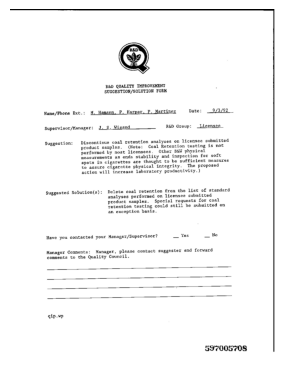

In [4]:
# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers
plt.show()
